## Exercise Sheet 7

### Name - Matrikelnummer:
1. Pham, Ngoc Anh Trung - 7176267 <br>
2. Viktor Vironski - 4330455 <br>
3. Andy Disser - 5984875 <br>



In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# load data set
data = np.loadtxt("./fisher_iris_shuffled.txt")
# data.shape

(150, 3)

### 1) center and standardize the data

In [17]:
# calculate mean
mean = np.mean(data, axis=0)

# calculate std
std = np.std(data, axis=0)
# print(std)

# center the data (subtract mean)
centered = data - mean
# print(centered)

# standardize (divide by standard deviation)
standardized = centered / std
# print(standardized)

### 2) compute the covariance matrix

In [107]:
# compute the covariance matrix of standardized
cov_matrix = np.matmul(standardized.T,standardized) / len(data)
print(cov_matrix)

[[ 1.         -0.10936925  0.87175416]
 [-0.10936925  1.         -0.4205161 ]
 [ 0.87175416 -0.4205161   1.        ]]


### 3) compute the principal components as the eigenvectors of the covariance matrix

In [108]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [109]:
eigenvalues

array([2.01382631, 0.07134297, 0.91483072])

In [110]:
eigenvectors

array([[-0.63137983,  0.64685642,  0.42771052],
       [ 0.35424227, -0.25005463,  0.90110216],
       [-0.6898347 , -0.72045087,  0.07126444]])

### What can the eigenvalues tell you about the structure of the data?

The eigenvectors of the larges eigenvalues explain the data the best. Therefore the eigenvector of the larges eigenvalue is PC1, the one with the second largest value is PC2 and so on.

<br><br>

### 4) Plot the projection of the data on all three possible combinations of eigenvectors

In [ ]:
# T = B * V
t = np.matmul(standardized, )

b_combi: 
[[[0 1]
  [0 1]
  [0 1]]

 [[1 2]
  [1 2]
  [1 2]]

 [[0 2]
  [0 2]
  [0 2]]]
b_normdata: 
[[[ 1.15917263  0.33784833  1.21768427]
  [-0.41600969 -1.05056946  0.36469871]
  [-0.17367395 -1.05056946 -0.14709262]
  ...
  [-0.05250608 -0.58776353  0.76275864]
  [ 0.55333328 -1.28197243  0.70589294]
  [ 1.40150837  0.33784833  0.53529583]]

 [[ 1.15917263  0.33784833  1.21768427]
  [-0.41600969 -1.05056946  0.36469871]
  [-0.17367395 -1.05056946 -0.14709262]
  ...
  [-0.05250608 -0.58776353  0.76275864]
  [ 0.55333328 -1.28197243  0.70589294]
  [ 1.40150837  0.33784833  0.53529583]]

 [[ 1.15917263  0.33784833  1.21768427]
  [-0.41600969 -1.05056946  0.36469871]
  [-0.17367395 -1.05056946 -0.14709262]
  ...
  [-0.05250608 -0.58776353  0.76275864]
  [ 0.55333328 -1.28197243  0.70589294]
  [ 1.40150837  0.33784833  0.53529583]]]
b_normdata.shape: (3, 150, 3)
b_eigenvectors: 
[[[-0.63137983  0.64685642  0.42771052]
  [ 0.35424227 -0.25005463  0.90110216]
  [-0.6898347  -0.72045087  

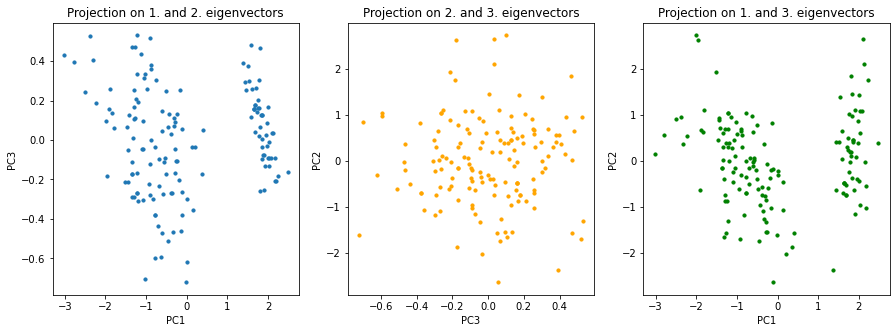

In [117]:
# all 3 possible combination of 2 eigenvectors
combi = np.array([[0, 1], [1, 2], [0, 2]])

# Broadcast to the suitable shapes
b_combi = np.broadcast_to(combi[:, np.newaxis, :], (3, 3, 2))
print(f"b_combi: \n{b_combi}")
b_normdata = np.broadcast_to(standardized[np.newaxis, :, :], (3, 150, 3))
print(f"b_normdata: \n{b_normdata}")
print(f"b_normdata.shape: {b_normdata.shape}")
b_eigenvectors = np.broadcast_to(eigenvectors[np.newaxis, :, :], (3, 3, 3))
print(f"b_eigenvectors: \n{b_eigenvectors}")

# an array of shape 3x3x2, each (3x2) subarray represents a subset of eigenvectors of size 2
subsets_of_eigenvec = np.take_along_axis(b_eigenvectors, b_combi, axis=2)

# all 3 different projections, store in a single array with shape 3x150x2
projections = np.matmul(standardized, subsets_of_eigenvec)

f3, axarr = plt.subplots(1,3, figsize=(15,5))        # Define the plot axes.
axarr[0].scatter(projections[0, :, 0], projections[0, :, 1], s=10)      # Define the first plot.
axarr[0].set_xlabel("PC1")
axarr[0].set_ylabel("PC3")
axarr[0].set_title("Projection on 1. and 2. eigenvectors")

axarr[1].scatter(projections[1, :, 0], projections[1, :, 1], s=10, color='orange')      # Define the first plot.
axarr[1].set_xlabel("PC3")
axarr[1].set_ylabel("PC2")
axarr[1].set_title("Projection on 2. and 3. eigenvectors")

axarr[2].scatter(projections[2, :, 0], projections[2, :, 1], s=10, color='green')      # Define the first plot.
axarr[2].set_xlabel("PC1")
axarr[2].set_ylabel("PC2")
axarr[2].set_title("Projection on 1. and 3. eigenvectors")

plt.show()